In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from functools import reduce
%matplotlib inline

##  Data Cleaning

##### In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.Files:
###### 1) whale_returns.csv
###### 2) algo_returns.csv
###### 3) sp500_history.csv

##  Whale Returns
##### Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("../Whales_HW4/whale_returns.csv")
whale_pd = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates=True, infer_datetime_format=True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_pd.describe(include='all')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [5]:
# Count nulls
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_pd.dropna(inplace=True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

##  Algorithmic Daily Returns

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("../Whales_HW4/algo_returns.csv")
algo_pd = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
algo_pd.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [9]:
# Count nulls
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

##  S&P 500 Returns

In [11]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Whales_HW4/sp500_history.csv")
sp500_pd = pd.read_csv(sp500_history_csv,  parse_dates=True, infer_datetime_format=True, index_col="Date")
sp500_pd = sp500_pd.sort_index(axis = 0)
sp500_pd.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Check Data Types
sp500_pd.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_pd['Close'] = sp500_pd['Close'].str.replace("$","")
sp500_pd['Close'] = sp500_pd['Close'].astype(float)   
sp500_pd.index.min()


Timestamp('2012-10-01 00:00:00')

In [14]:
# Calculate Daily Returns
sp500_returns = sp500_pd['Close'].pct_change()
sp500_returns = pd.DataFrame(sp500_returns)

#sp500_returns.index.min()
#sp500_returns.to_csv('returns.csv')
#sp500_returns.head()


In [15]:
# Drop nulls
sp500_pd.dropna(inplace=True)
sp500_pd.isnull().sum()
sp500_pd

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
2012-10-08,1455.88
2012-10-09,1441.48
2012-10-10,1432.56
2012-10-11,1432.84


In [16]:
# Rename Column
sp500_returns.columns = ["S&P 500"]
sp500_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:

# Concatenate all DataFrames into a single DataFrame

data_frames = [whale_pd, algo_pd, sp500_returns]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how = 'outer'), data_frames)

merged_df.dropna(inplace = True)
merged_df.to_csv('merged.csv')
merged_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


##  Portfolio Analysis

### Performance
###### Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

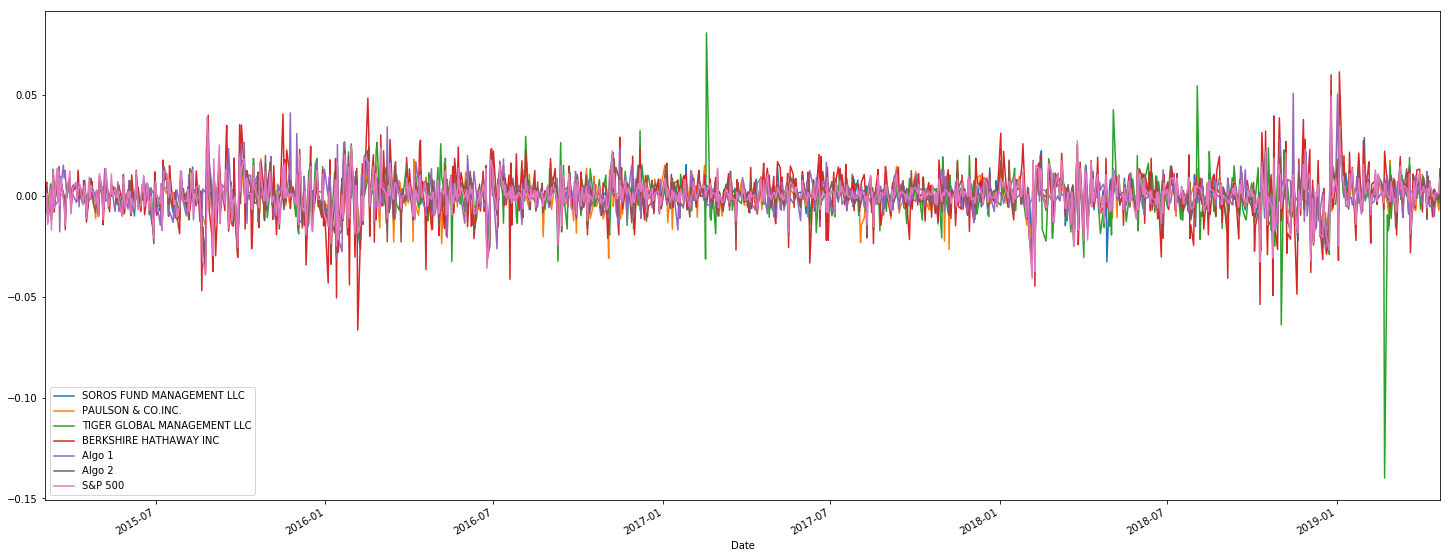

In [18]:
# Plot daily returns
merged_df.plot(subplots = False,figsize = (25,10))

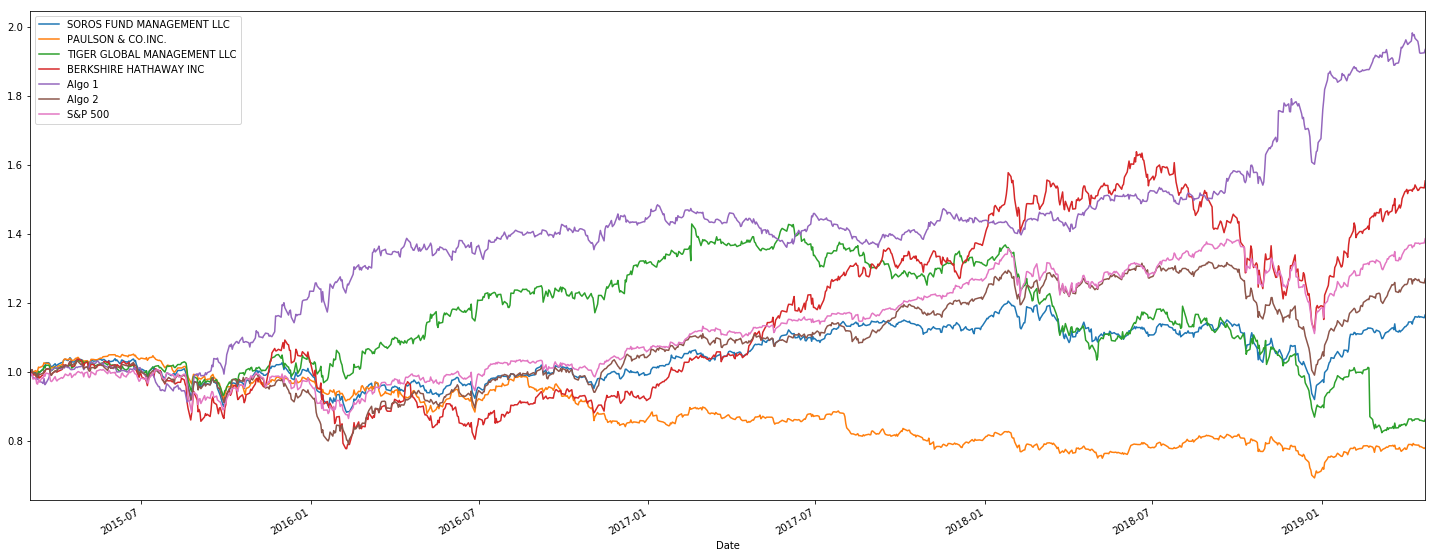

In [19]:
# Plot cumulative returns
cum_returns_df = (1 + merged_df).cumprod()
cum_returns_df.plot(subplots = False, figsize = (25,10))

##  Risk
###### Create a box plot for each portfolio. 
###### Calculate the standard deviation for all portfolios
###### Determine which portfolios are riskier than the S&P 500
###### Calculate the Annualized Standard Deviation

Text(0.5, 1.0, 'Portfolio Risk')

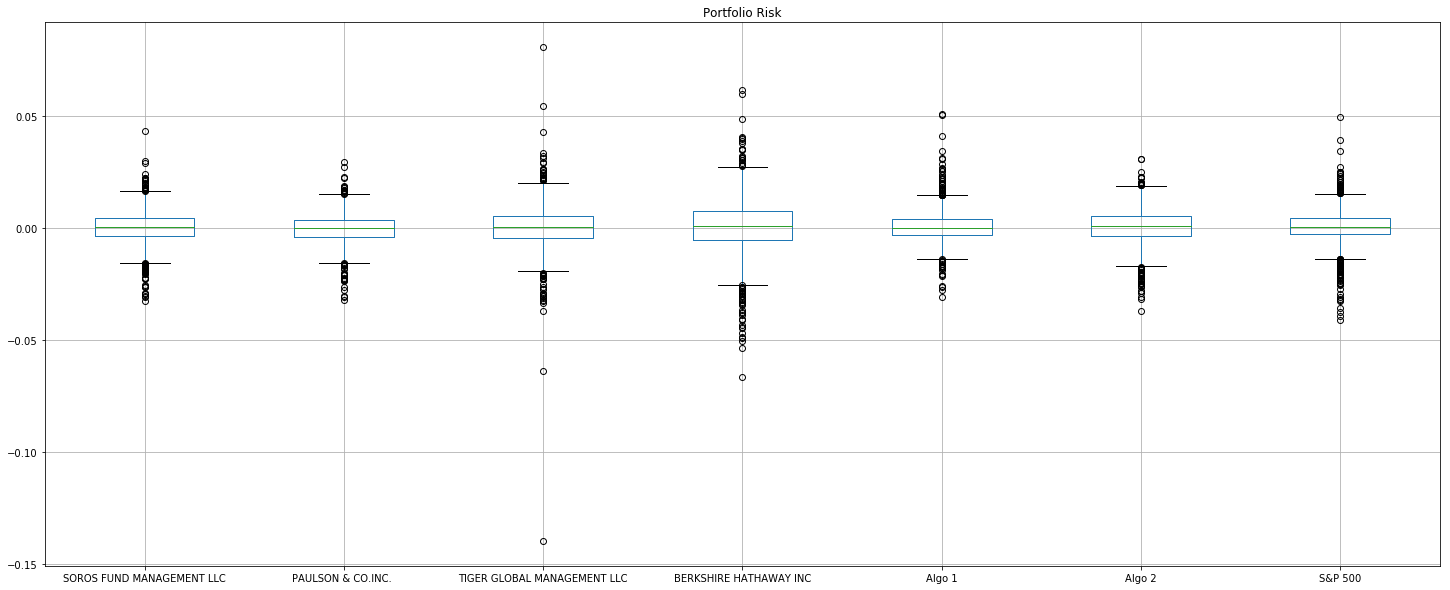

In [20]:
# Box plot to visually show risk
bplot = merged_df.boxplot(figsize = (25,10))
bplot.axes.set_title("Portfolio Risk",
                    fontsize=12)

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = merged_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64


In [22]:
merged_std = merged_df.std()
type(merged_std)
merged_std > 0.008554

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [23]:
# Determine which portfolios are riskier than the S&P 500
riskier = daily_std[daily_std > daily_std["S&P 500"]]
# Below Portfolios are Riskier because their std is GREATER than SP500

print("Below Portfolios are Riskier because their std is GREATER than SP500:")

print(riskier) 

Below Portfolios are Riskier because their std is GREATER than SP500:
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [24]:
 # Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

##  Rolling Statistics
###### Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
###### Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
###### Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
###### An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

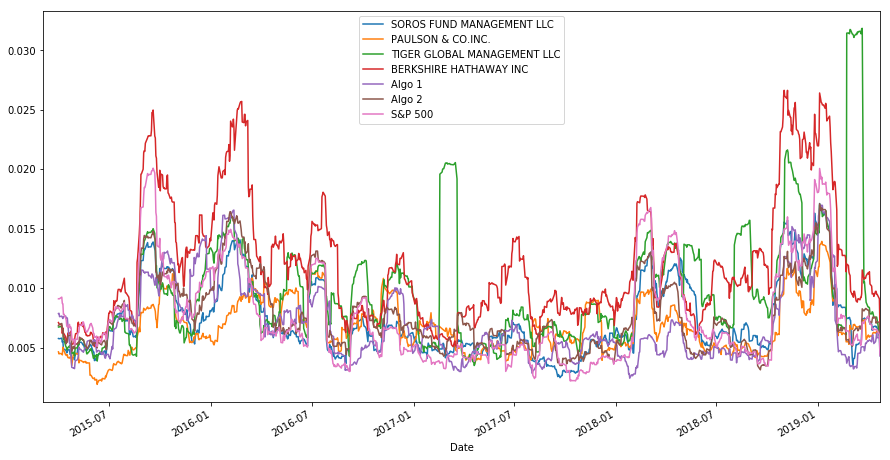

In [25]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
merged_df.rolling(window=21).std().plot(figsize=(15,8))


In [26]:
# Construct a correlation table
import seaborn as sns
correlation = merged_df.corr()

correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


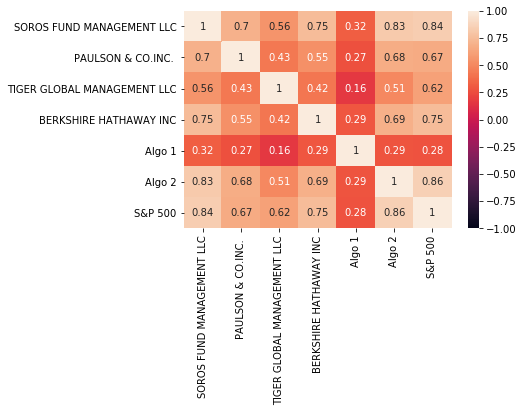

In [27]:
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)

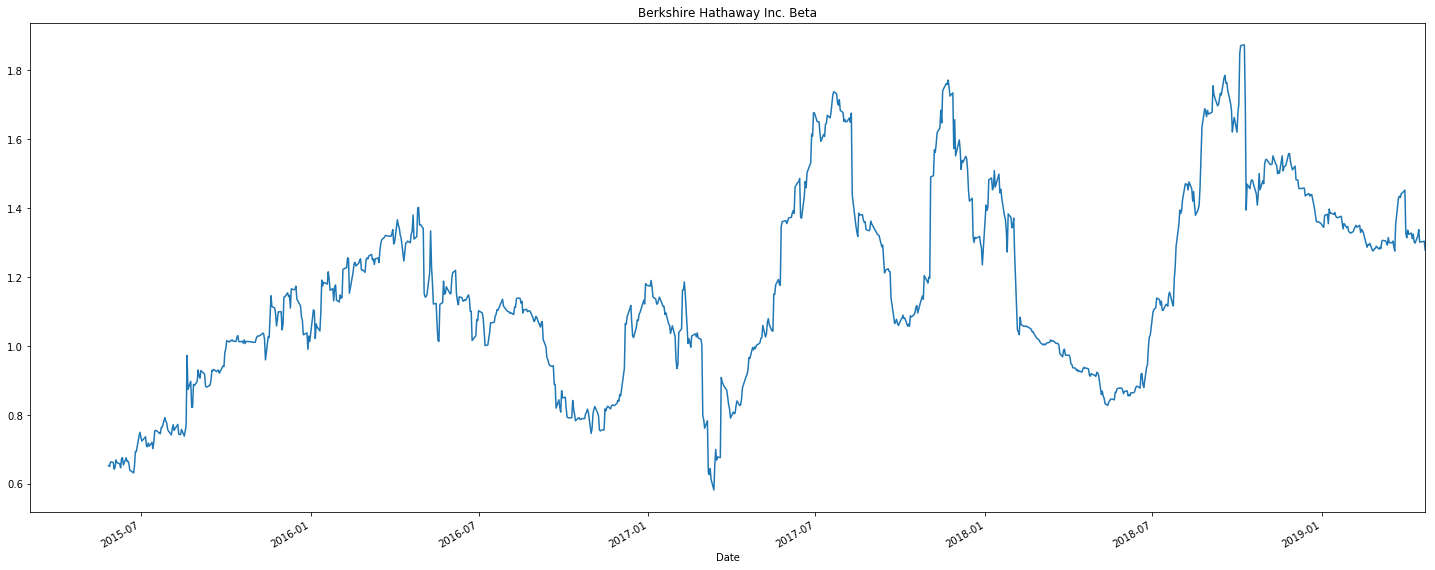

In [28]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Calculate a rolling window using the exponentially weighted moving average. 
# (Your graph may differ, dependent upon which portfolio you are comparing)
merged_df['rolling_covariance'] = merged_df['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(merged_df['S&P 500'])
merged_df['rolling_variance'] = merged_df['S&P 500'].rolling(window = 60).var()
merged_df['rolling_beta'] = merged_df['rolling_covariance']/merged_df['rolling_variance']

merged_df['rolling_beta'].plot(figsize = (25,10), title = 'Berkshire Hathaway Inc. Beta')

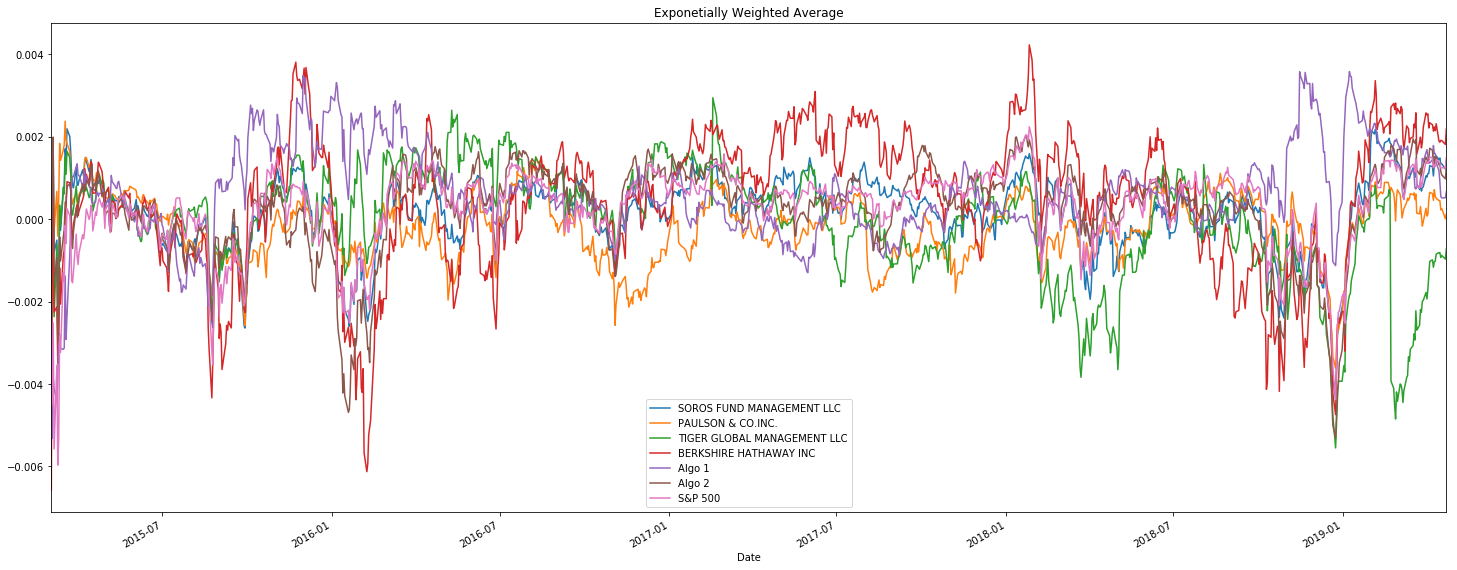

In [29]:
merged_set = merged_df[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P 500']]

merged_set.ewm(halflife=21, adjust = True).mean().plot(figsize = (25,10), title = 'Exponetially Weighted Average')

In [30]:
merged_df.drop(columns = ['rolling_covariance', 'rolling_variance', 'rolling_beta'], inplace = True)
merged_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.001918
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.012601
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075


## Sharpe Ratios
###### In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)
###### 1) Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
###### 2) Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [31]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (merged_df.mean() * 252) / (merged_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

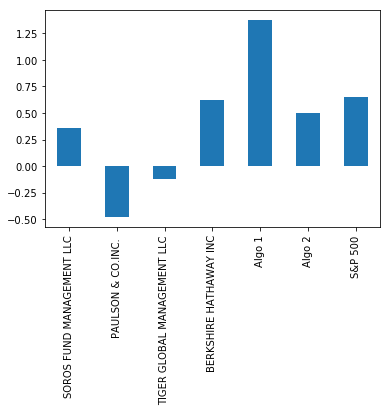

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

## Portfolio Returns
###### Visit Google Sheets and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
###### Download the data as CSV files and calculate the portfolio returns.
###### Calculate the returns for each stock.
###### Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
###### Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?

## Your analysis should include the following:

#### Using all portfolios:
###### The annualized standard deviation (252 trading days) for all portfolios.
###### The plotted rolling standard deviation using a 21 trading day window for all portfolios.
###### The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
###### A correlation table.


#### Using your custom portfolio and one other of your choosing:
###### The plotted beta.

###  Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:

tickers = ['aapl','cost','goog']
combined_df = None
for ticker in tickers:
    TICKER = ticker.upper()
    ticker_returns_csv = Path(f"../Whales_HW4/{ticker}_historical.csv")
    ticker_df = pd.read_csv(ticker_returns_csv,index_col="Trade DATE", parse_dates=True)
    ticker_df.index.names = ["Date"]
    ticker_df.sort_index(inplace=True)
    ticker_df.drop(columns=['Symbol'],inplace=True)
    ticker_df.columns = [TICKER]
    ticker_df[TICKER] = ticker_df[TICKER].astype('float64').pct_change()
    combined_df = pd.concat([merged_df,ticker_df], axis="columns", join="inner")
    
print(combined_df.head())
print(combined_df.tail())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-05-11                  -0.004717            0.000982   
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-05-11                     0.002624               -0.004125  0.000358   
2018-05-14                     0.000000                0.000000  0.000915   
2018-05-15                    -0.003189               -0.014606 -0.001135   
2018-05-16                     0.005480                0.004310 -0.002326   
2018-05-17                    -0.006267               -0.005140 -0.006949   

              Algo 2   S&P 500  

In [34]:
# Read the first stock
goog_csv = Path("../Whales_HW4/goog_historical.csv")
goog_pd = pd.read_csv(goog_csv, parse_dates=True, infer_datetime_format=True, index_col = 'Trade DATE')
goog_pd = goog_pd.sort_index(axis = 0)
goog_pd.head()
drop_columns = [] 
goog_pd.drop(drop_columns, axis = 1, inplace = True)
goog_pd.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [35]:
#sort index
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GOOG
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.002940


In [36]:
# Read the second stock

aapl_csv = Path("../Whales_HW4/aapl_historical.csv")
aapl_pd = pd.read_csv(aapl_csv, parse_dates=True, infer_datetime_format=True, index_col = 'Trade DATE')
aapl_pd = aapl_pd.sort_index(axis = 0)
aapl_pd.head()
drop_columns = [] 
aapl_pd.drop(drop_columns, axis = 1, inplace = True)
aapl_pd.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [37]:
# Read the third stock
cost_csv = Path("../Whales_HW4/cost_historical.csv")
cost_pd = pd.read_csv(cost_csv, parse_dates=True, infer_datetime_format=True, index_col = 'Trade DATE')
cost_pd = cost_pd.sort_index(axis = 0)
cost_pd.head()
drop_columns = [] 
cost_pd.drop(drop_columns, axis = 1, inplace = True)
cost_pd.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [38]:
# Concatenate all stocks into a single DataFrame
combined_all = pd.concat([ticker_df, combined_df], axis='columns', join='inner')
combined_all.rename(columns= {0: "Custom"},inplace = True )
combined_all.dropna(inplace=True)
combined_all.sort_index()
combined_all.head()


,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GOOG
Date,,,,,,,,,
2018-05-14,0.001766,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.001766
2018-05-15,-0.019060,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.019060
2018-05-16,0.002354,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.002354
2018-05-17,-0.002940,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.002940
2018-05-18,-0.011339,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.011339


In [39]:

data_frames = [goog_pd, cost_pd, aapl_pd]
concat_df = pd.concat(data_frames, axis = 0, sort = False)
concat_df.head()
concat_df.tail()
concat_df.shape
type(concat_df)
concat_df.columns
concat_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [40]:
# Reset the index
concat_df.reset_index().head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [41]:
# Pivot so that each column of prices represents a unique symbol
concat_pivot = pd.pivot_table(concat_df, index = ['Trade DATE'], columns = ['Symbol'])

concat_pivot.head()
concat_pivot = concat_pivot.sum(level = 1, axis = 1)
concat_pivot.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [42]:
# Drop Nulls
concat_pivot = concat_pivot.pct_change()
concat_pivot.head()

concat_pivot.dropna(inplace = True)
concat_pivot.head()
combined_df.dropna(inplace=True)
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,GOOG
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.001766
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.019060
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.002354
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.002940
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.011339
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387,0.012397
2018-05-22,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003136,-0.009124
2018-05-23,-0.000899,-0.000659,0.005062,0.011108,-0.002093,0.001962,0.003248,0.009311
2018-05-24,-0.002160,-0.002229,0.000880,0.002245,0.001075,-0.001121,-0.002023,-0.000417


### Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
weights = [1/3, 1/3, 1/3]
weighted_returns = concat_pivot.dot(weights)
weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [44]:
# Calculate weighted portfolio returns

weights = [1/3, 1/3, 1/3]
weighted_returns = concat_pivot.dot(weights)
weighted_returns.head()
type(weighted_returns)
weighted_returns.index
weighted_returns_df = weighted_returns.to_frame()
type(weighted_returns_df)

weighted_returns_df.head()





,0
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


In [45]:
weighted_returns_df.columns=['Weights']
weighted_returns_df

,Weights
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061
2018-05-21,0.007600
2018-05-22,-0.004962
2018-05-23,0.003850
2018-05-24,0.000751


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
data_frames = [merged_df, weighted_returns]
#merged_custom_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how = 'outer'), data_frames)
merged_custom_df = pd.concat(data_frames, axis= 'columns', join= 'inner')
merged_custom_df.dropna(inplace = True)
merged_custom_df.to_csv('merged_custom.csv')
merged_custom_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [47]:
merged_custom_df.columns
merged_custom_df = merged_custom_df.rename(columns = {0: 'Custom'})
merged_custom_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [48]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
merged_custom_df.dropna(inplace=True)
print(merged_custom_df.tail())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2   S&P 500    Custom  
2019-04-16  0.002899  0.000509  0.000340  
2019-04-17 -0.005228 -0.002274  0.009292  
2019-04-18 -0.001229  0.001579  0.001545 

In [52]:
# Risk
new_risk = merged_custom_df.std()
print(new_risk.sort_values())

PAULSON & CO.INC.              0.007353
Algo 1                         0.008423
Algo 2                         0.008791
SOROS FUND MANAGEMENT LLC      0.009240
S&P 500                        0.009578
Custom                         0.013323
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
dtype: float64


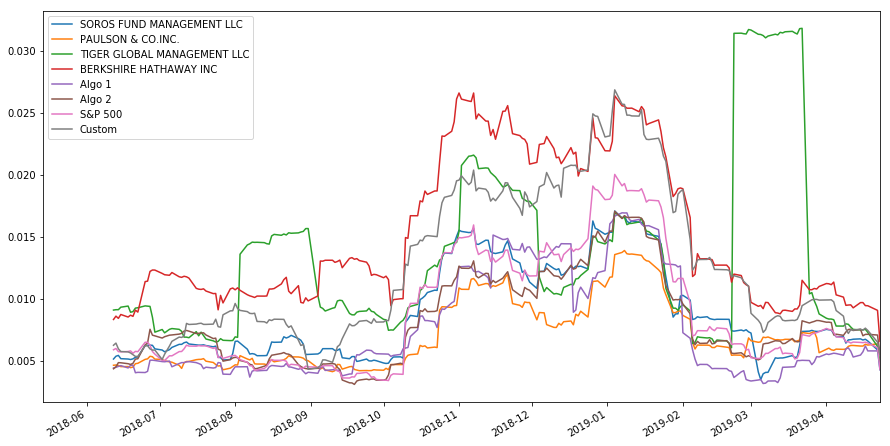

In [54]:
# Rolling
merged_custom_df.rolling(window=21).std().plot(figsize=(15,8))

In [55]:
corr = merged_custom_df.corr()
daily_retrns = merged_custom_df.pct_change()

print(corr)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.791962   
PAULSON & CO.INC.                             0.791962            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.478627            0.485375   
BERKSHIRE HATHAWAY INC                        0.816675            0.650758   
Algo 1                                        0.337826            0.361301   
Algo 2                                        0.862846            0.783656   
S&P 500                                       0.876981            0.766680   
Custom                                        0.733250            0.644210   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.478627   
PAULSON & CO.INC.                               0.485375   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.325457 

In [56]:
# Annualized Sharpe Ratios
sharpe_ratio = (merged_custom_df.mean() * 252) / (merged_custom_df.std() * np.sqrt(252))
sharpe_ratio



SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

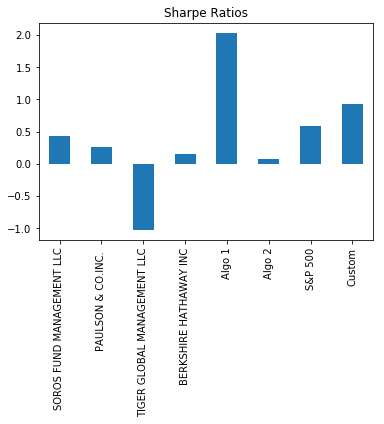

In [57]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = 'bar', title = "Sharpe Ratios")

In [58]:
# Create a correlation analysis
merged_df = merged_custom_df[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P 500']]
merged_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


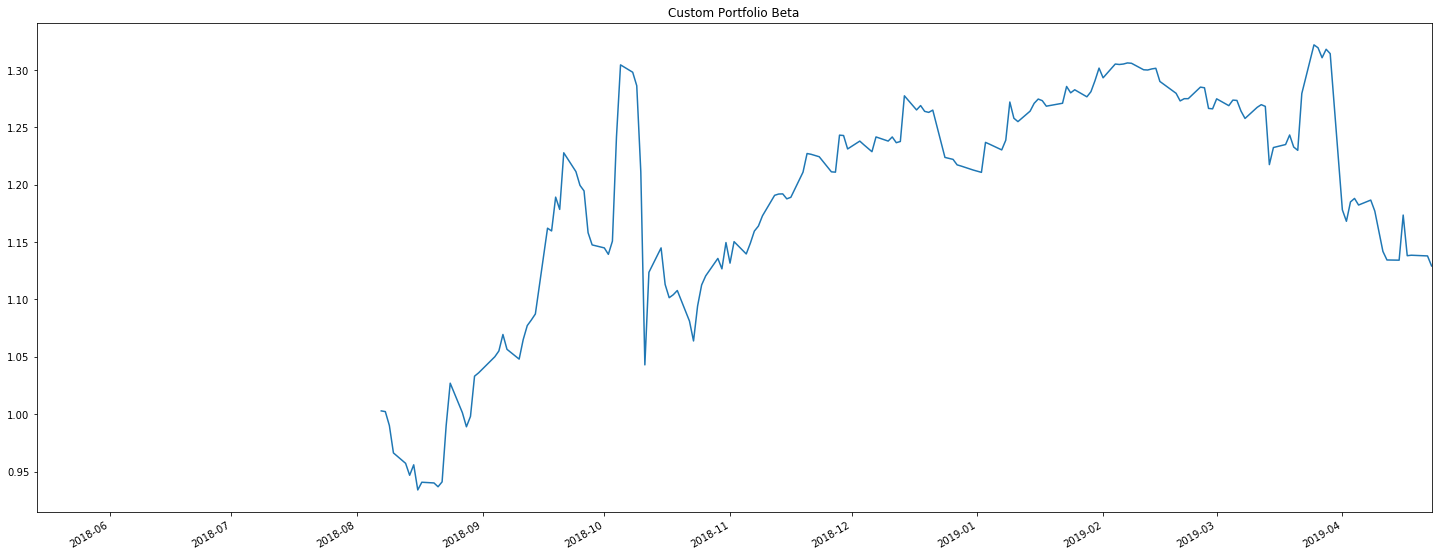

In [59]:
# Beta
merged_custom_df['rolling_covariance'] = merged_custom_df['Custom'].rolling(window = 60).cov(merged_df['S&P 500'])
merged_custom_df['rolling_variance'] = merged_custom_df['S&P 500'].rolling(window = 60).var()
merged_custom_df['rolling_beta'] = merged_custom_df['rolling_covariance']/merged_custom_df['rolling_variance']

merged_custom_df['rolling_beta'].plot(figsize = (25,10), title = 'Custom Portfolio Beta')



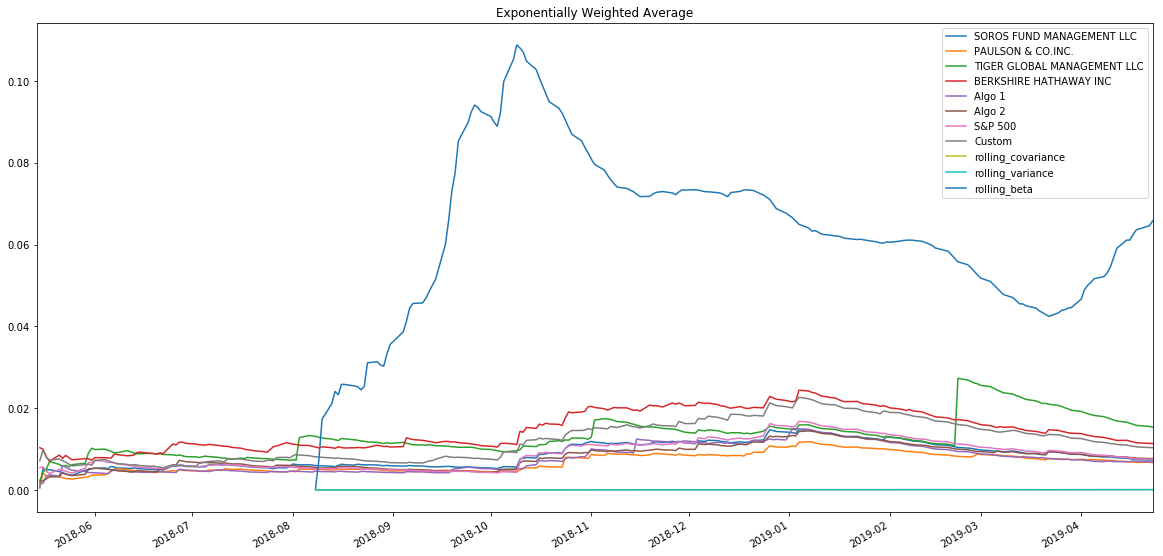

In [60]:
merged_custom_df.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")